# The Best *Star Wars* Movie, According to Survey Responses

## Introduction

While waiting for the *Star Wars: The Force Awakens* to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) became interested in answering some questions about *Star Wars* fans. In particular, they wondered: **does the rest of America realize that *The Empire Strikes Back* is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed *Star Wars* fans from June 3-6, 2014, using the online tool SurveyMonkey. They received 1,186 total responses, which can be downloaded from [their GitHub repository.](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) The team then asked respondents which specific films they had seen, producing 835 responses.

For this project, I will be cleaning and exploring the dataset in Jupyter Notebook. This will be another opportunity to practice some data cleaning skills using real-world data.

## Getting Started

The following code reads the data into a pandas DataFrame:

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

pd.options.display.max_columns = 40 # To avoid truncated output
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,4.0,3.0,6.0,5.0,2.0,Very favorably,Very favorably,Very favorably,

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

We needed to specify an `encoding` because the dataset has some characters that aren't in Python's default `utf-8` encoding. The data has several columns, including the following:

- `RespondentID`: an anonymized ID for the respondent
- `Gender`: the respondent's gender
- `Age`: the respondent's age
- `Household Income`: the respondent's income
- `Education`: the respondent's education level
- `Location (Census Region)`: the respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?`: a `Yes` or `No` response
- `Do you consider yourself to be a fan of the Star Wars film franchise?`: a `Yes` or `No` response

There are several other columns containing answers to questions about the *Star Wars* movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

## Cleaning and Mapping Yes/No Columns

Let us first consider the last two questions from the earlier list. Both represent `Yes/No` questions. They can also be `NaN` where a respondent chose not to answer a question. Both columns are currently string types, because the main values they contain are `Yes` and `No`.

We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison. We can use the `pandas.Series.map()` method on series objects to perform the conversion.

In [3]:
yes_no = {
    "Yes": True,
    "No": False
}
star_wars.iloc[:, 1] = star_wars.iloc[:, 1].map(yes_no)
star_wars.iloc[:, 2] = star_wars.iloc[:, 2].map(yes_no)

print(star_wars.iloc[:, 1].value_counts(dropna=False))
print('\n')
print(star_wars.iloc[:, 2].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


## Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:

- `Which of the following Star Wars films have you seen? Please select all that apply.`: whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
- `Unnamed: 4`: whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.
- `Unnamed: 5`: whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.
- `Unnamed: 6`: whether or not the respondent saw `Star Wars: Episode IV A New Hope`.
- `Unnamed: 7`: whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
- `Unnamed: 8`: whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of the columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earler, except that we'll need to include the movie title and `NaN` in the mapping dictionary.

In [4]:
import numpy as np

# Be careful with spacing!
movie_mapping = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.nan: False
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)
    
# Check work    
star_wars.iloc[:5, 3:9]

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


In [5]:
# Rename columns
seen_movies = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'
}
star_wars = star_wars.rename(columns=seen_movies)
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the *Star Wars* movies in order from least to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.`: how much the respondent liked `Star Wars: Episode I The Phantom Menace`.
- `Unnamed: 10`: how much the respondent liked `Star Wars: Episode II Attack of the Clones`.
- `Unnamed: 11`: how much the respondent liked `Star Wars: Episode III Revenge of the Sith`.
- `Unnamed: 12`: how much the respondent liked `Star Wars: Episode IV A New Hope`.
- `Unnamed: 13`: how much the respondent liked `Star Wars: Episode V The Empire Strikes Back`.
- `Unnamed: 14`: how much the respondent liked `Star Wars: Episode VI Return of the Jedi`.

Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily. We can do the numeric conversion with the `pandas.DataFrame.astype()` method.

In [6]:
# Convert data types
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Rename columns
movie_rankings = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
}
star_wars = star_wars.rename(columns=movie_rankings)
star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

## Finding the Highest Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest ranked movie quicker. To do this, we'll take the mean of each ranking column. A lower ranking is better!

In [7]:
ranking_means = star_wars.iloc[:, 9:15].mean()
ranking_means

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

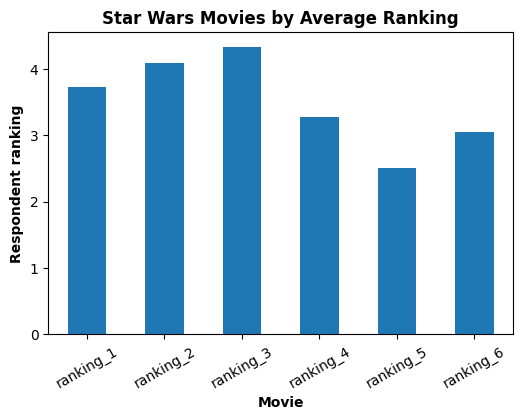

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

ranking_means.plot(kind='bar', rot=30)
plt.title('Star Wars Movies by Average Ranking', weight='bold')
plt.xlabel('Movie', weight='bold')
plt.ylabel('Respondent ranking', weight='bold')
plt.show()

The clear winner among FiveThirtyEight survey respondents is *Star Wars: Episode V - The Empire Strikes Back.* Respondents ranked their least favorite as *Star Wars: Episode III - Revenge of the Sith.* In general, respondents favor the later three installments (but first to be released) over the first three.

## Finding the Most Viewed Movie

Earlier in this project, we cleaned up the `seen` columns and converted their values to the Boolean type. When we call methods like `pandas.DataFrame.sum()`, they treat Booleans like integers. They consider `True` a `1` and `False` a `0`. That means we can figure out how many people have seen each movie just by taking the sum of the column.

In [9]:
view_counts = star_wars.iloc[:, 3:9].sum()
view_counts

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

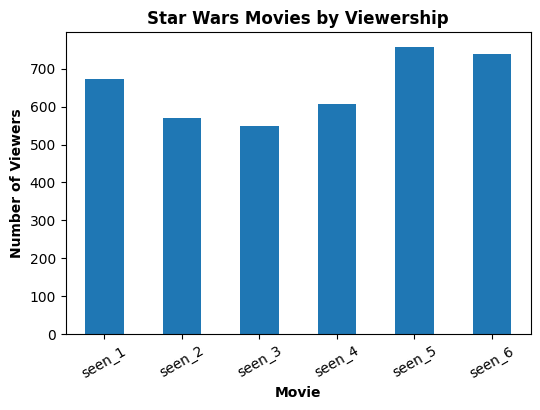

In [10]:
view_counts.plot(kind='bar', rot=30)
plt.title('Star Wars Movies by Viewership', weight='bold')
plt.xlabel('Movie', weight='bold')
plt.ylabel('Number of Viewers', weight='bold')
plt.show()

Interestingly, the highest rated movie — *The Empire Strikes Back* — is also the most viewed, while the lowest rated movie — *Revenge of the Sith* — is the least viewed. The original three movies also have higher general viewership than the newer three. These findings, along with the ratings data, suggest that the original movies enjoy more popularity than the newer ones.

## Exploring the Data by Binary Segments

We know which movies the survey population as a whole ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

- `Do you consider yourself to be a fan of the Star Wars film franchise?`: True or False
- `Do you consider yourself to be a fan of the Star Trek franchise?`: `Yes` or `No`
- `Gender`: `Male` or `Female`

We can split a DataFrame into two groups based on a binary column by creating two subsets of that column. The subsets will allow us to compute the most viewed movie, the highest ranked movie, and other statistics separately for each group.

### Split by Gender

In [11]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

In [12]:
# Highest ranked movie
male_rankings = males.iloc[:, 9:15].mean()
female_rankings = females.iloc[:, 9:15].mean()

print(male_rankings)
print('\n')
print(female_rankings)

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64


ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64


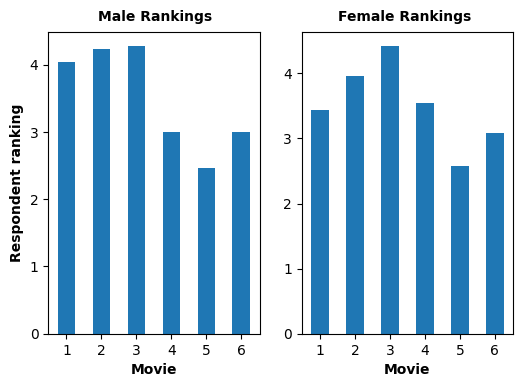

In [13]:
plt.figure()
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.bar(male_rankings.index, male_rankings, width=0.5)
ax2.bar(female_rankings.index, female_rankings, width=0.5)
ax1.text(0.9, 4.65, 'Male Rankings', weight='bold')
ax2.text(0.5, 4.8, 'Female Rankings', weight='bold')

ax1.set_ylabel('Respondent ranking', weight='bold')
for ax in [ax1, ax2]:
    ax.set_xlabel('Movie', weight='bold')
    ax.set_xticklabels([1, 2, 3, 4, 5, 6])
    ax1.set_yticks([0, 1, 2, 3, 4])

In [14]:
# Most watched movie
male_views = males.iloc[:, 3:9].sum()
female_views = females.iloc[:, 3:9].sum()

print(male_views)
print('\n')
print(female_views)

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64


seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64


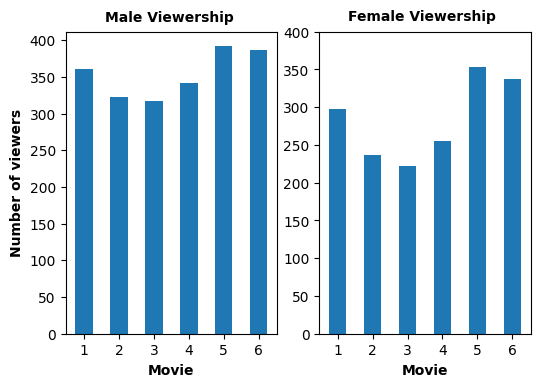

In [15]:
plt.figure()
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.bar(male_views.index, male_views, width=0.5)
ax2.bar(female_views.index, female_views, width=0.5)
ax1.text(0.6, 425, 'Male Viewership', weight='bold')
ax2.text(0.3, 415, 'Female Viewership', weight='bold')

ax1.set_ylabel('Number of viewers', weight='bold')
for ax in [ax1, ax2]:
    ax.set_xlabel('Movie', weight='bold')
    ax.set_xticklabels([1, 2, 3, 4, 5, 6])
    ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400])

It appears that more men than women watched the newer films, but men ranked the newer films lower than women did. Men have overall higher film viewership. Among both men and women, *The Empire Strikes Back* is both the most watched and the highest ranked.

### Split by *Star Wars* Fandom Membership

In [16]:
starwars_fans = star_wars[star_wars.iloc[:, 2] == True]
starwars_nonfans = star_wars[(star_wars.iloc[:, 2] == False) | (star_wars.iloc[:, 2] == np.nan)]

In [17]:
# Highest ranked movie
starwars_fan_ranks = starwars_fans.iloc[:, 9:15].mean()
starwars_nonfan_ranks = starwars_nonfans.iloc[:, 9:15].mean()

print(starwars_fan_ranks)
print('\n')
print(starwars_nonfan_ranks)

ranking_1    4.141304
ranking_2    4.342391
ranking_3    4.417423
ranking_4    2.932971
ranking_5    2.333333
ranking_6    2.829710
dtype: float64


ranking_1    2.936396
ranking_2    3.591549
ranking_3    4.193662
ranking_4    3.933099
ranking_5    2.862676
ranking_6    3.471831
dtype: float64


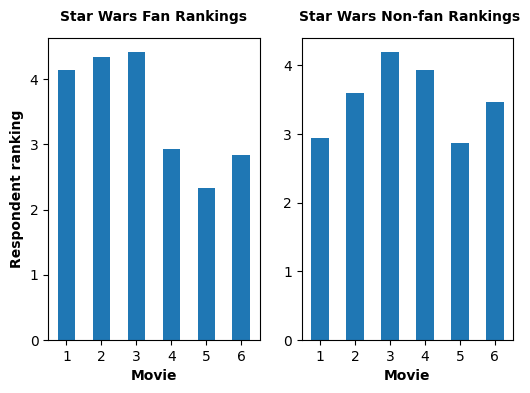

In [18]:
plt.figure()
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.bar(starwars_fan_ranks.index, starwars_fan_ranks, width=0.5)
ax2.bar(starwars_nonfan_ranks.index, starwars_nonfan_ranks, width=0.5)
ax1.text(-0.2, 4.9, 'Star Wars Fan Rankings', weight='bold')
ax2.text(-0.6, 4.65, 'Star Wars Non-fan Rankings', weight='bold')

ax1.set_ylabel('Respondent ranking', weight='bold')
for ax in [ax1, ax2]:
    ax.set_xlabel('Movie', weight='bold')
    ax.set_xticklabels([1, 2, 3, 4, 5, 6])
    ax.set_yticks([0, 1, 2, 3, 4])

In [19]:
# Most watched movie
starwars_fan_views = starwars_fans.iloc[:, 3:9].sum()
starwars_nonfan_views = starwars_nonfans.iloc[:, 3:9].sum()

print(starwars_fan_views)
print('\n')
print(starwars_nonfan_views)

seen_1    500
seen_2    463
seen_3    450
seen_4    483
seen_5    538
seen_6    537
dtype: int64


seen_1    173
seen_2    108
seen_3    100
seen_4    124
seen_5    220
seen_6    201
dtype: int64


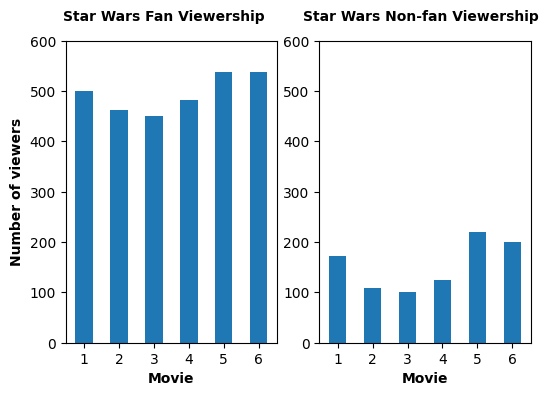

In [20]:
plt.figure()
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.bar(starwars_fan_views.index, starwars_fan_views, width=0.5)
ax2.bar(starwars_nonfan_views.index, starwars_nonfan_views, width=0.5)
ax1.text(-0.6, 640, 'Star Wars Fan Viewership', weight='bold')
ax2.text(-1, 640, 'Star Wars Non-fan Viewership', weight='bold')

ax1.set_ylabel('Number of viewers', weight='bold')
for ax in [ax1, ax2]:
    ax.set_xlabel('Movie', weight='bold')
    ax.set_xticklabels([1, 2, 3, 4, 5, 6])
    ax.set_yticks([0, 100, 200, 300, 400, 500, 600])

Among *Star Wars* fans, viewership is much higher across all movies, and there is a clear preference for the original three mvovies over the newer three. For everyone else, viewship is far lower, with episodes II-IV receiving particularly low views. However, non-fans appear to rank *The Empire Strikes Back* (one of the originals) and *The Phantom Menace* (one of the newer installments) equally highly. Nonetheless, among both groups, *The Empire Strikes Back* still has the highest amount of views as well as the highest rankings.

### Split by *Star Trek* Fandom Membership

In [21]:
# Check all possible values
star_wars.iloc[:, -6].value_counts(dropna=False)

No     641
Yes    427
NaN    118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [22]:
startrek_fans = star_wars[star_wars.iloc[:, -6] == 'Yes']
startrek_nonfans = star_wars[(star_wars.iloc[:, -6] == 'No') | (star_wars.iloc[:, -6] == np.nan)]

In [23]:
# Highest ranked movie
startrek_fan_ranks = startrek_fans.iloc[:, 9:15].mean()
startrek_nonfan_ranks = startrek_nonfans.iloc[:, 9:15].mean()

print(startrek_fan_ranks)
print('\n')
print(startrek_nonfan_ranks)

ranking_1    3.968675
ranking_2    4.255422
ranking_3    4.403382
ranking_4    3.110843
ranking_5    2.407229
ranking_6    2.850602
dtype: float64


ranking_1    3.487864
ranking_2    3.915254
ranking_3    4.278450
ranking_4    3.433414
ranking_5    2.634383
ranking_6    3.244552
dtype: float64


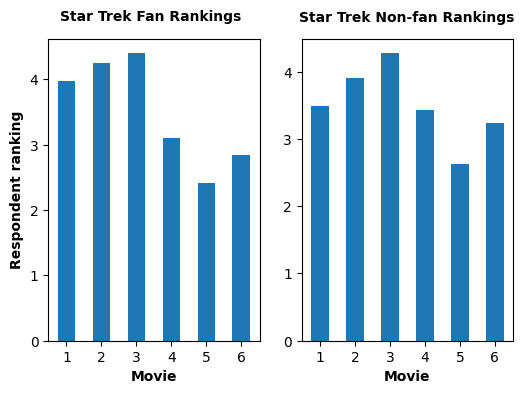

In [24]:
plt.figure()
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.bar(startrek_fan_ranks.index, startrek_fan_ranks, width=0.5)
ax2.bar(startrek_nonfan_ranks.index, startrek_nonfan_ranks, width=0.5)
ax1.text(-0.2, 4.9, 'Star Trek Fan Rankings', weight='bold')
ax2.text(-0.6, 4.75, 'Star Trek Non-fan Rankings', weight='bold')

ax1.set_ylabel('Respondent ranking', weight='bold')
for ax in [ax1, ax2]:
    ax.set_xlabel('Movie', weight='bold')
    ax.set_xticklabels([1, 2, 3, 4, 5, 6])
    ax.set_yticks([0, 1, 2, 3, 4])

In [25]:
# Most watched movie
startrek_fan_views = startrek_fans.iloc[:, 3:9].sum()
startrek_nonfan_views = startrek_nonfans.iloc[:, 3:9].sum()

print(startrek_fan_views)
print('\n')
print(startrek_nonfan_views)

seen_1    364
seen_2    336
seen_3    322
seen_4    342
seen_5    397
seen_6    396
dtype: int64


seen_1    301
seen_2    228
seen_3    221
seen_4    258
seen_5    353
seen_6    334
dtype: int64


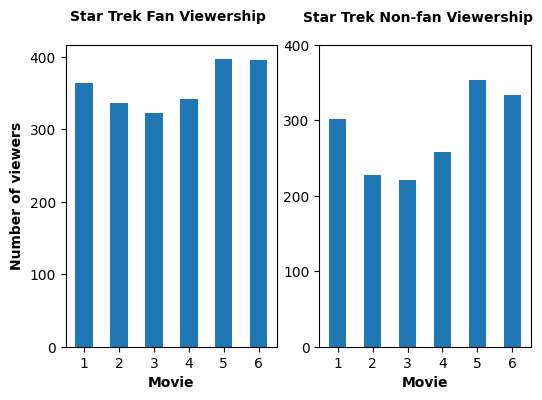

In [26]:
plt.figure()
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.bar(startrek_fan_views.index, startrek_fan_views, width=0.5)
ax2.bar(startrek_nonfan_views.index, startrek_nonfan_views, width=0.5)
ax1.text(-0.4, 450, 'Star Trek Fan Viewership', weight='bold')
ax2.text(-1, 430, 'Star Trek Non-fan Viewership', weight='bold')

ax1.set_ylabel('Number of viewers', weight='bold')
for ax in [ax1, ax2]:
    ax.set_xlabel('Movie', weight='bold')
    ax.set_xticklabels([1, 2, 3, 4, 5, 6])
    ax.set_yticks([0, 100, 200, 300, 400])

Rankings among both *Star Trek* franchise fans and non-fans show similar patterns, although there is a more distinct preference for the original *Star Wars* films among *Star Trek* fans. Non-fans were more generous in ranking *The Phantom Menace* in particular.

There is general lower viewership among *Star Trek* fans than among the *Star Wars* fan subset, although *Star Trek* non-fans have higher viewership than *Star Wars* non-fans. However, among the two non-fan subsets, both exhibit higher viewership of installments I, V, and VI. And as always, *The Empire Strikes Back* has the highest views and rankings among *Star Trek* fans as well, while *Revenge of the Sith* has the lowest average views and rankings right along with the other subsets.

## Conclusion

After cleaning, analyzing, and visualizing the FiveThirtyEight team's dataset of survey responses, we have found that the 835 respondents agreed with the team that *The Empire Strikes Back* is indeed the best of the bunch. We found that this opinion cut across several different subgroups of respondents, including by gender, *Star Wars* fan status, and others.

Here are some potential next steps to get even more insights from the data:

- Try to segment the data based on columns like `Education`, `Location (Census Region)`, and `Which character shot first?`, which aren't binary. Are there any interesting patterns?
- Clean columns `15` through `28`, which contain data on the characters respondents view favorably and unfavorably.
    - Which character do respondents like the most?
    - Which character do respondents dislike the most?
    - Which character is the most controversial (split between likes and dislikes)?